# General import functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

from igraph import *
from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative
from anndata import read_h5ad
from anndata import read_csv
import anndata

sc.logging.print_versions()

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
MulticoreTSNE       NA
PIL                 7.2.0
anndata             0.7.4
backcall            0.1.0
bottleneck          1.2.1
cffi                1.12.3
cloudpickle         1.2.2
colorama            0.4.1
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.0
dask                2.5.2
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
igraph              0.8.2
importlib_metadata  1.7.0
ipykernel           5.1.2
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.15.1
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.34.0
louvain             0.7.0
matplotlib          3.3.1
mpl_toolkits        NA
natsort             7.0.1
numba               0.51.0
numexpr             2.7.1
numpy               1.19.2
packaging           20.4
pandas

In [2]:
pwd

'/home/angela/sapiens/tabula-sapiens/analysis-scripts/pilot1'

# Load 10X data

In [3]:
path = '/mnt/ibm_lg/angela/sapiens/TSP1/10X/'

In [4]:
import os
pilot1_runs = [x[1] for x in os.walk(path)][0]
pilot1_runs

['TSP1_blood_2',
 'TSP1_bladder_1',
 'TSP1_muscle_2',
 'TSP1_muscle_3',
 'TSP1_bladder_3',
 'TSP1_lung_2',
 'TSP1_endopancreas_1',
 'TSP1_bladder_2',
 'TSP1_endopancreas_3',
 'TSP1_muscle_1',
 'TSP1_exopancreas2_3',
 'TSP1_blood_3',
 'TSP1_lung_1',
 'TSP1_exopancreas1_3',
 'TSP1_blood_1',
 'TSP1_exopancreas1_1',
 'TSP1_exopancreas2_1',
 'TSP1_endopancreas_2',
 'TSP1_exopancreas1_2',
 'TSP1_lung_3',
 'TSP1_exopancreas2_2']

In [5]:
adata = sc.AnnData()

for r in pilot1_runs:
    
    print(r)
    adataaux = sc.read_10x_mtx(path+r+'/raw_feature_bc_matrix/',cache=True)
    
#     bfcmingenes = adataaux.shape[0]
#     sc.pp.filter_cells(adataaux, min_genes=200)
    
#     bfcmincounts = adataaux.shape[0]
#     sc.pp.filter_cells(adataaux, min_counts=2500) 
    
#     print(r+ " size")
#     display(adataaux.shape)

    adataaux.obs['10X_run'] = r
    
    adataaux.obs['tissue'] = r.split('_')[1]
    adataaux.obs['replicate'] = r.split('_')[2]
    
    try:
        adata = adata.concatenate(adataaux,join='outer')
        adata.obs = adata.obs.drop('batch',axis=1)
    except:
        adata = adataaux.copy()

adata.obs['method'] = '10X'
adata.obs['sequencer'] = 'novaseq'
adata.obs['pilot'] = "TSP1"
adata.obs['sex'] = 'female'
    
# adata.write("/mnt/ibm_lg/angela/sapiens/TSP1/TSP1-10X-raw-not_filtered.h5ad")
# adata.write("/mnt/ibm_lg/angela/sapiens/TSP1/TSP1-10X-min_genes_200-min_reads_2500.h5ad")
adata

TSP1_blood_2
... reading from cache file cache/mnt-ibm_lg-angela-sapiens-TSP1-10X-TSP1_blood_2-raw_feature_bc_matrix-matrix.h5ad


/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/angela/anaconda3/lib/python3.7/site-packages/scipy/sparse/sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


TSP1_bladder_1
... reading from cache file cache/mnt-ibm_lg-angela-sapiens-TSP1-10X-TSP1_bladder_1-raw_feature_bc_matrix-matrix.h5ad
TSP1_muscle_2
... reading from cache file cache/mnt-ibm_lg-angela-sapiens-TSP1-10X-TSP1_muscle_2-raw_feature_bc_matrix-matrix.h5ad
TSP1_muscle_3
... reading from cache file cache/mnt-ibm_lg-angela-sapiens-TSP1-10X-TSP1_muscle_3-raw_feature_bc_matrix-matrix.h5ad
TSP1_bladder_3
... reading from cache file cache/mnt-ibm_lg-angela-sapiens-TSP1-10X-TSP1_bladder_3-raw_feature_bc_matrix-matrix.h5ad
TSP1_lung_2
... reading from cache file cache/mnt-ibm_lg-angela-sapiens-TSP1-10X-TSP1_lung_2-raw_feature_bc_matrix-matrix.h5ad
TSP1_endopancreas_1
... reading from cache file cache/mnt-ibm_lg-angela-sapiens-TSP1-10X-TSP1_endopancreas_1-raw_feature_bc_matrix-matrix.h5ad
TSP1_bladder_2
... reading from cache file cache/mnt-ibm_lg-angela-sapiens-TSP1-10X-TSP1_bladder_2-raw_feature_bc_matrix-matrix.h5ad
TSP1_endopancreas_3
... reading from cache file cache/mnt-ibm_lg-ange

AnnData object with n_obs × n_vars = 142692480 × 58870
    obs: '10X_run', 'tissue', 'replicate', 'method', 'sequencer', 'pilot', 'sex'
    var: 'gene_ids', 'feature_types'

In [8]:
set(adata.obs['tissue'])

{'bladder',
 'blood',
 'endopancreas',
 'exopancreas1',
 'exopancreas2',
 'lung',
 'muscle'}

In [11]:
adata.var = adata.var[['gene_ids-1','feature_types-1']]
adata.var = adata.var.rename(columns={'gene_ids-1':'gene_ids','feature_types-1':'feature_types'})

In [12]:
adata

AnnData object with n_obs × n_vars = 44199 × 58870 
    obs: '10X_run', 'n_counts', 'n_genes', 'replicate', 'tissue', 'method', 'sequencer', 'pilot', 'sex'
    var: 'gene_ids', 'feature_types'

In [9]:
adata.write("/mnt/ibm_lg/angela/sapiens/TSP1/TSP1-10X-raw-not_filtered.h5ad")

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing '10X_run' as categorical
... storing 'tissue' as categorical
... storing 'replicate' as categorical
... storing 'method' as categorical
... storing 'sequencer' as categorical
... storing 'pilot' as categorical
... storing 'sex' as categorical
... storing 'feature_types' as categorical


In [13]:
adata.write("/mnt/ibm_lg/angela/sapiens/TSP1/TSP1-10X-min_genes_200-min_reads_2500.h5ad")

# Load SS2 data

## Read genecount table

In [ ]:
adata = read_csv('./190627_A00111_0335_BHLMG5DSXX.csv')
adata = adata.transpose()
adata

In [ ]:
adata.var_names

In [ ]:
adata.obs['plate'] = [c.split('_')[0] for c in adata.obs.index]
adata = adata[adata.obs['plate']!='KTRareCell']
adata

In [ ]:
adata.obs['well'] = [c.split('_')[1] for c in adata.obs.index]
adata.obs.head()

## Read metadata

In [ ]:
metadata = pd.read_csv('./TS_Pilot_Plate Info_071019 - Sheet1.csv')
metadata = metadata[~metadata.NovaSeqRun.isna()]
metadata

# Load the raw data

In [1]:
pwd

'/Users/angela.pisco/src/sapiens/tabula-sapiens/analysis-scripts'

In [76]:
adata = anndata.read_h5ad('../../tabula-sapiens-10X-pilot-raw.h5ad')
adata

AnnData object with n_obs × n_vars = 54702 × 26577 
    obs: 'batch', 'replicate', 'tissue', 'method', 'sex', 'subjectid'

In [77]:
adata.X[100:220,200:500].todense()

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
set(adata.obs['tissue'])

{'bladder',
 'blood',
 'endopancreas',
 'exopancreas1',
 'exopancreas2',
 'lung',
 'muscle'}

Filter out cells with less than 200 genes detected and genes expressed in less than 3 cells

In [79]:
sc.pp.filter_cells(adata, min_genes=200)
display(adata)
sc.pp.filter_cells(adata, min_counts=2500)
display(adata)
sc.pp.filter_genes(adata, min_cells=1)
display(adata)

AnnData object with n_obs × n_vars = 53799 × 26577 
    obs: 'batch', 'replicate', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'

AnnData object with n_obs × n_vars = 37263 × 26577 
    obs: 'batch', 'replicate', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'

AnnData object with n_obs × n_vars = 37263 × 22340 
    obs: 'batch', 'replicate', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells'

In [80]:
adata.raw = adata

save the filtered data

In [81]:
adata.write('../../data-objs/tabula-sapiens-10X-pilot-raw-filtered.h5ad')

# Load the filtered data

In [5]:
adata = read_h5ad('../../data-objs/tabula-sapiens-10X-pilot-raw-filtered.h5ad')

In [12]:
# adata = read_h5ad('../../sapiens-facs-droplet-processed.h5ad')
adata.write('../../sapiens-facs-droplet-processed.h5ad')

In [13]:
set(adata.obs['tissue'])

{'bladder',
 'blood',
 'endopancreas',
 'exopancreas1',
 'exopancreas2',
 'lung',
 'muscle'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [15]:
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

Look at the overall distribution of the data

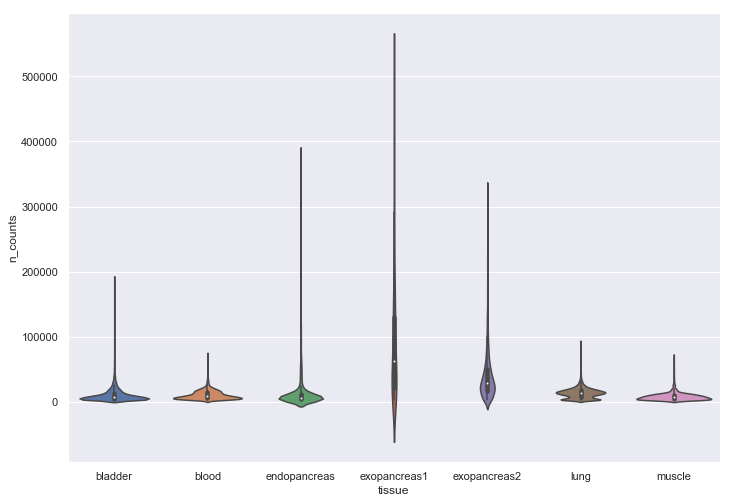

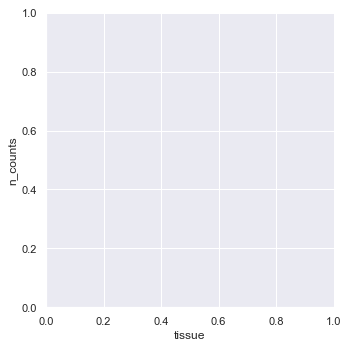

In [46]:
# df = adata
fig, ax = plt.subplots();
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.catplot(data=adata.obs,y='n_counts',x='tissue',kind='violin',ax=ax)
   
sns.despine()

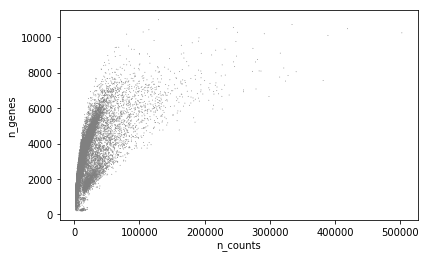

In [29]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [ ]:
adata = adata[adata.obs['n_genes'] < 5000, :]

In [4]:
adata

AnnData object with n_obs × n_vars = 64367 × 21380 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [ ]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [ ]:
sc.pp.log1p(adata)


In [ ]:
adata.raw = adata

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.highly_variable_genes(adata)


In [75]:
adata


AnnData object with n_obs × n_vars = 54702 × 26577 
    obs: 'batch', 'replicate', 'tissue', 'method', 'sex', 'subjectid'

In [ ]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [4]:
sc.tl.pca(adata, svd_solver='arpack')


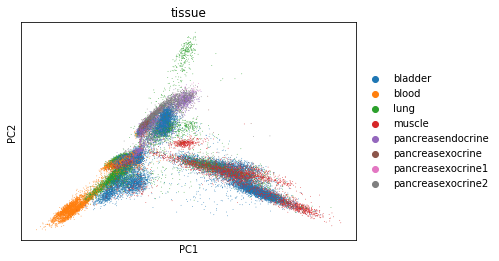

In [5]:
sc.pl.pca(adata, color='tissue')


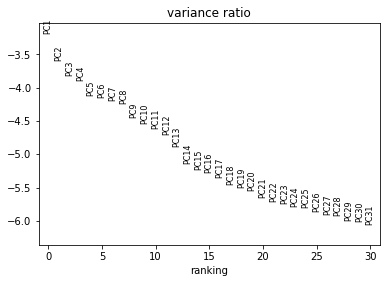

In [6]:
sc.pl.pca_variance_ratio(adata, log=True)


Now we're ready to start fishing out some structure in the data

In [7]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=24)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel

In [8]:
sc.tl.umap(adata)


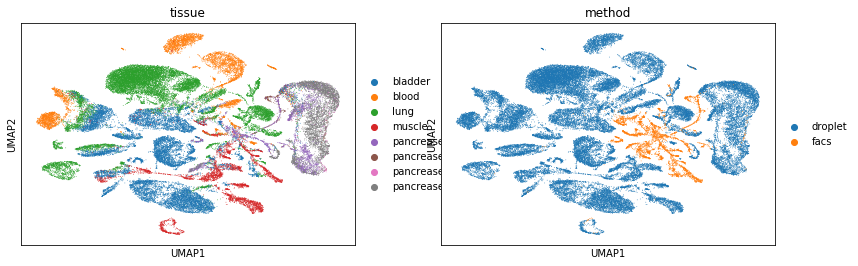

In [11]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue','method'])

In [ ]:
set(adata.obs['tissue'])

In [ ]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [ ]:
sc.pl.umap(adata[adata.obs['tissue']=='bladder'], color=['10X_plate'])

Looking good! Into clustering...

In [10]:
sc.tl.louvain(adata)

In [ ]:
sc.pl.umap(adata, color=['tissue','10X_plate','louvain'])

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(15)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
sapiens_rank_genes_scores = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores','pvals']})
sapiens_rank_genes_scores.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes-scores.csv')
sapiens_rank_genes_scores.head(25)

Let's look at the overall cycling distribution just for curiosity

In [ ]:
# cell cycle distribution -- using Tirosh et al',' Science 2015
g1s_genes =  ['MCM5','PCNA','TYMS','FEN1','MCM2','MCM4','RRM1','UNG','GINS2','MCM6','CDCA7','DTL','PRIM1','UHRF1','MLF1IP','HELLS','RFC2','RPA2','NASP',
         'RAD51AP1','GMNN','WDR76','SLBP','CCNE2','UBR7','POLD3','MSH2','ATAD2','RAD51','RRM2','CDC45','CDC6','EXO1','TIPIN','DSCC1','BLM','CASP8AP2',
         'USP1','CLSPN','POLA1','CHAF1B','BRIP1','E2F8']

g2m_genes = ['HMGB2','CDK1','NUSAP1','UBE2C','BIRC5','TPX2','TOP2A','NDC80','CKS2','NUF2','CKS1B','MKI67','TMPO','CENPF','TACC3','FAM64A','SMC4','CCNB2',
        'CKAP2L','CKAP2','AURKB','BUB1','KIF11','ANP32E','TUBB4B','GTSE1','KIF20B','HJURP','HJURP','CDCA3','HN1','CDC20','TTK','CDC25C','KIF2C',
        'RANGAP1','NCAPD2','DLGAP5','CDCA2','CDCA8','ECT2','KIF23','HMMR','AURKA','PSRC1','ANLN','LBR','CKAP5','CENPE','CTCF','NEK2','G2E3','GAS2L3',
        'CBX5','CENPA']


In [ ]:
sc.tl.score_genes_cell_cycle(adata, s_genes=g1s_genes, g2m_genes=g2m_genes)


In [ ]:
adata

In [ ]:
sc.pl.umap(adata,color=['tissue','phase'])

Next we will look at the overall tissue compartments

In [ ]:
# add tissue compartments -- to be added
epithelial_markers = []
stromal_markers = []
immune_markers = []
endothelial_markera = []

# Split the tissues

In [ ]:
adata.obs.groupby(['tissue','10X_plate'])['subjectid'].agg({'ncells pilot':len})#.to_csv('/maca-bulk/sapiens/ncell_pilot.csv')




In [ ]:
adata = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered.h5ad')
print('tissue','total number of cells')
for t in list(set(adata.obs['tissue'])):
    tiss = adata[adata.obs['tissue']==t]
    print(t,len(tiss))
    tiss.write('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-'+t+'.h5ad')
    

Analyse each tissue individually

In [ ]:
adata_all_tissues = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered.h5ad')
for t in list(set(adata_all_tissues.obs['tissue'])):
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Now looking at ' +t+ '!!!')
    print(' ')
    adata = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-'+t+'.h5ad')
    
    print('make sure data is consistent...')
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    
    print('get global view of the tissue')
    adata.obs['n_counts'] = adata.X.sum(axis=1).A1
    
    sc.pl.violin(adata, ['n_genes', 'n_counts'],
             jitter=0.4, multi_panel=True)
    sc.pl.scatter(adata, x='n_counts', y='n_genes')
    
    print('repeat the basic pre-processing')
    adata = adata[adata.obs['n_genes'] < 5000, :]
    adata = adata[adata.obs['n_counts'] > 500, :]
    
    sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
    sc.pp.log1p(adata)
    
    adata.raw = adata
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pp.scale(adata, max_value=10)
    
    print('PCA')
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pl.pca_overview(adata)
    
    print('neighbors')
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)
    
    print('visualizations')
    sc.tl.umap(adata)
    sc.tl.tsne(adata)
    
    print('doing Louvain clustering for quick overview but likely to change this into Leiden')
    sc.tl.louvain(adata,resolution=.5)
    
    print('plot')
    sc.pl.tsne(adata, color=['10X_plate','louvain'],cmap='Oranges',ncols=1)
    sc.pl.umap(adata, color=['10X_plate','louvain'],cmap='Oranges',ncols=1)
    
    print('compute tissue rank genes')
    sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
    tiss_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
    tiss_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-'+t+'-rank-genes.csv')
    
    result = adata.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    tiss_rank_genes_score = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores','pvals']})
    tiss_rank_genes_score.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-'+t+'-rank-genes-score.csv')
    print(tiss_rank_genes.head(10))



    